# 项目实现
# 获取数据、基本数据信息查看

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/train_V2.csv')

In [3]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
data.shape

(4446966, 29)

# 数据基本处理
# 数据缺失值处理

In [5]:
np.any(data['winPlacePerc'].isnull())

True

In [6]:
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
data.drop(2744604,inplace=True)

In [8]:
data.shape

(4446965, 29)

# 特征数据规范化处理
## 查看每场比赛参加的人数

In [9]:
count = data.groupby('matchId')['matchId'].transform('count')

In [10]:
data['game_players'] = count

In [11]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,game_players
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


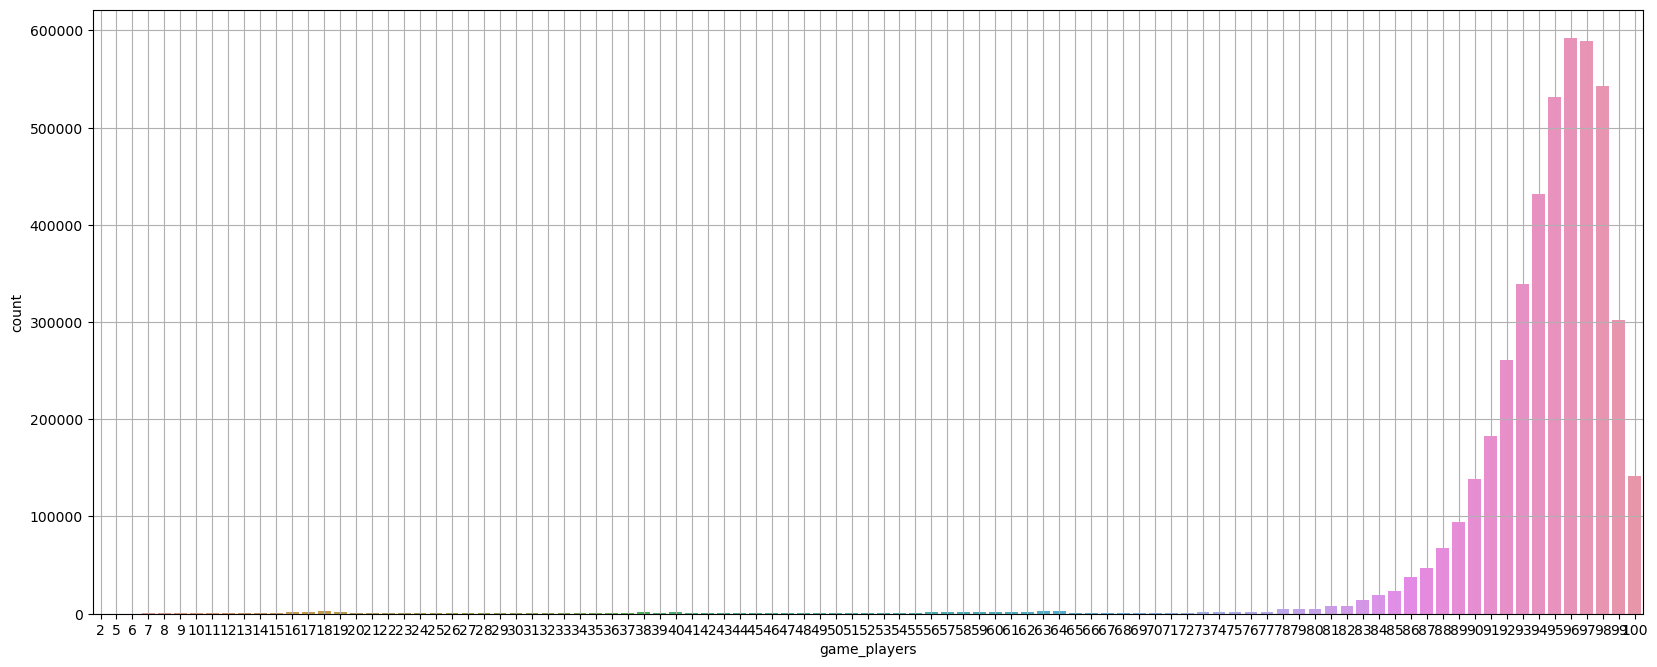

In [12]:
plt.figure(figsize=(20,8),dpi=100)
sns.countplot(data['game_players'])
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


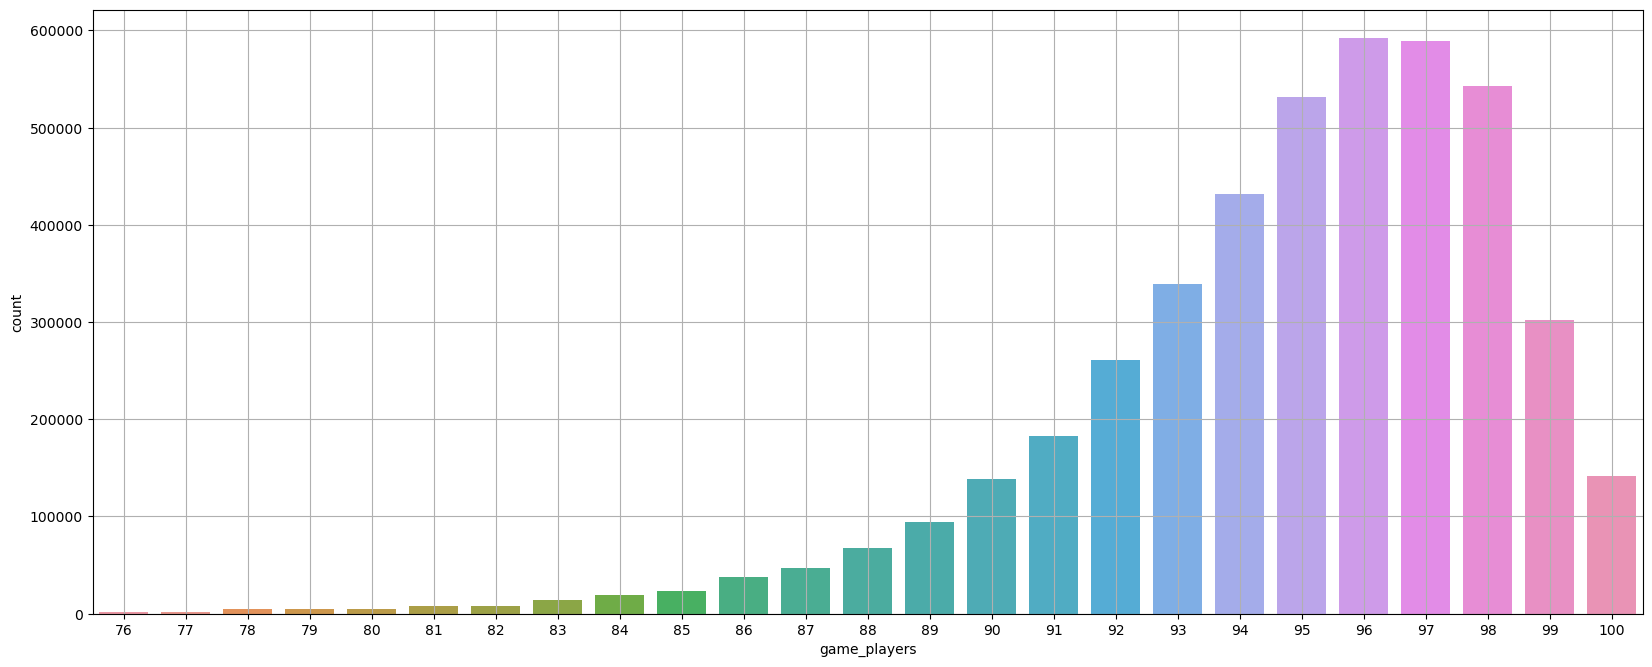

In [13]:
plt.figure(figsize=(20,8),dpi=100)
sns.countplot(data[data['game_players']>75]['game_players'])
plt.grid()
plt.show()

# 规范化输出部分数据

In [14]:
data['killsNorm'] = data['kills'] * ((100-data['game_players'])/100 + 1)

In [15]:
data["damageDealtNorm"] = data['damageDealt'] * ((100-data['game_players'])/100 + 1)
data["maxPlaceNorm"] = data['maxPlace'] * ((100-data['game_players'])/100 + 1)
data["matchDurationNorm"] = data['matchDuration'] * ((100-data['game_players'])/100 + 1)

In [16]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,game_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,244.80,1,1466,0.4444,96,0.00,0.0000,29.12,1358.24
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,1434.00,5,0,0.6400,91,0.00,99.7023,28.34,1936.93
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,161.80,2,0,0.7755,98,0.00,69.3600,51.00,1344.36
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,202.70,3,0,0.1667,91,0.00,35.8610,33.79,1565.24
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,49.75,2,0,0.1875,97,1.03,103.0000,99.91,1466.72


# 部分变量合成

In [17]:
data["healsandboosts"] = data['heals'] + data['boosts']

In [18]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,walkDistance,weaponsAcquired,winPoints,winPlacePerc,game_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,244.80,1,1466,0.4444,96,0.00,0.0000,29.12,1358.24,0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,1434.00,5,0,0.6400,91,0.00,99.7023,28.34,1936.93,0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,161.80,2,0,0.7755,98,0.00,69.3600,51.00,1344.36,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,202.70,3,0,0.1667,91,0.00,35.8610,33.79,1565.24,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,49.75,2,0,0.1875,97,1.03,103.0000,99.91,1466.72,0



# 异常值处理
## 异常值处理：删除有击杀，但是完全没有移动的玩家

In [19]:
data["totalDistance"] = data["rideDistance"] + data["walkDistance"] + data["swimDistance"]

In [20]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,weaponsAcquired,winPoints,winPlacePerc,game_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,1,1466,0.4444,96,0.00,0.0000,29.12,1358.24,0,244.8000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,5,0,0.6400,91,0.00,99.7023,28.34,1936.93,0,1445.0445
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,2,0,0.7755,98,0.00,69.3600,51.00,1344.36,0,161.8000
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,3,0,0.1667,91,0.00,35.8610,33.79,1565.24,0,202.7000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,2,0,0.1875,97,1.03,103.0000,99.91,1466.72,0,49.7500


In [21]:
(data['totalDistance'] == 0) & (data['kills']>0)

0          False
1          False
2          False
3          False
4          False
           ...  
4446961    False
4446962    False
4446963    False
4446964    False
4446965    False
Length: 4446965, dtype: bool

In [22]:
data[(data['totalDistance'] == 0) & (data['kills']>0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,weaponsAcquired,winPoints,winPlacePerc,game_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.000,0,0,3,18,...,8,0,0.8571,58,8.52,842.0600,21.30,842.06,3,0.0
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.600,0,0,6,33,...,22,0,0.6000,42,4.74,547.6280,17.38,2834.52,6,0.0
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.000,0,4,5,3,...,13,0,0.8947,21,35.80,3132.5000,35.80,1607.42,5,0.0
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.800,0,0,0,69,...,7,1500,0.0000,73,1.27,200.4060,24.13,1014.73,0,0.0
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.000,0,1,0,37,...,10,0,0.3000,42,1.58,158.0000,17.38,2834.52,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440232,1f3a6d69d22c7e,60b2849191c539,ff9cd80c0d8fb7,0,0,4.316,0,0,0,61,...,7,1500,0.8889,75,1.25,5.3950,12.50,998.75,0,0.0
4440898,a089cb33a75968,eda174acfb503b,4c6b1a0e4cb346,0,0,90.830,0,0,4,42,...,8,0,0.0000,49,1.51,137.1533,3.02,2708.94,4,0.0
4440927,0634c650048997,5ccccee03a7f17,fc0bbecba8db99,2,2,909.100,7,2,16,26,...,7,1500,0.6000,47,9.18,1390.9230,16.83,2747.88,18,0.0
4441511,f5d385cadfab7e,a068f79011113c,fc0bbecba8db99,6,2,696.400,9,2,0,18,...,16,1500,0.9000,47,13.77,1065.4920,16.83,2747.88,2,0.0


In [23]:
data.drop(data[(data['totalDistance'] == 0) & (data['kills']>0)].index,inplace=True)

In [24]:
data.shape

(4445430, 36)

## 异常值处理：删除驾车杀敌数异常的数据

In [25]:
data[data['roadKills']>10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,weaponsAcquired,winPoints,winPlacePerc,game_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,0,1371,0.4286,92,15.12,1345.68,99.36,1572.48,0,1282.302
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,5,1533,0.4713,88,12.32,1234.24,98.56,2179.52,0,4934.600
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,4,1568,1.0000,38,32.40,3359.88,61.56,3191.40,19,5876.000
3524413,9d9d044f81de72,8be97e1ba792e3,859e2c2db5b125,0,3,1866.0,0,5,7,1,...,10,1606,0.9398,84,20.88,2164.56,97.44,2233.00,10,7853.000


In [26]:
data.drop(data[data['roadKills']>10].index,inplace=True)

In [27]:
data.shape

(4445426, 36)

## 异常值处理：删除玩家在一局中杀敌数超过30人的数据

In [28]:
data[data['kills']>30]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,weaponsAcquired,winPoints,winPlacePerc,game_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,48,1500,0.8571,16,64.40,6854.00,14.72,3308.32,0,48.82
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,45,1500,1.0000,16,57.04,5680.08,14.72,3308.32,27,780.70
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,61,0,0.7000,11,90.72,10355.31,20.79,3398.22,7,23.71
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,16,1500,1.0000,62,57.96,5565.54,11.04,1164.72,0,718.30
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,41,0,1.0000,11,66.15,5993.19,17.01,3394.44,15,71.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021018,1f1c3dda0296df,7c95f475fd2cdb,a9e84c456cc859,6,0,3406.0,0,8,10,2,...,40,0,0.9167,13,57.97,6369.22,24.31,3356.65,10,3817.00
4127904,f699c842c5dfab,9d69e4e697d296,1ac375e4121651,5,0,3420.0,39,20,1,1,...,29,1500,0.7500,36,54.12,5608.80,8.20,2072.96,1,319.20
4148675,5283367a7f8d06,35b9b765110fd2,f900de1ec39fa5,12,0,3050.0,0,5,4,7,...,89,0,0.4000,11,58.59,5764.50,20.79,3398.22,4,123.80
4235682,6874be9215646b,af1d17223258d0,0f09bd72c4ba97,1,0,3006.0,0,9,18,2,...,20,1500,0.4286,28,56.76,5170.32,13.76,3085.68,18,557.50


In [29]:
data.drop(data[data["kills"] > 30].index, inplace=True)

In [30]:
data.shape

(4445331, 36)

## 异常值处理：删除爆头率异常数据

In [31]:
data['headshot_rate'] = data['headshotKills'] / data['kills']

In [32]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,game_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,headshot_rate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,1466,0.4444,96,0.00,0.0000,29.12,1358.24,0,244.8000,NaN
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.6400,91,0.00,99.7023,28.34,1936.93,0,1445.0445,NaN
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.7755,98,0.00,69.3600,51.00,1344.36,0,161.8000,NaN
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.1667,91,0.00,35.8610,33.79,1565.24,0,202.7000,NaN
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.1875,97,1.03,103.0000,99.91,1466.72,0,49.7500,0.0


In [33]:
data['headshot_rate'] = data['headshot_rate'].fillna(0)

In [34]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,game_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,headshot_rate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,1466,0.4444,96,0.00,0.0000,29.12,1358.24,0,244.8000,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.6400,91,0.00,99.7023,28.34,1936.93,0,1445.0445,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.7755,98,0.00,69.3600,51.00,1344.36,0,161.8000,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.1667,91,0.00,35.8610,33.79,1565.24,0,202.7000,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.1875,97,1.03,103.0000,99.91,1466.72,0,49.7500,0.0


In [35]:
data.shape

(4445331, 37)

In [36]:
data[(data['headshot_rate']==1)&(data['kills']>7)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,game_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,headshot_rate
66266,1a23298ecdb19d,d5d54b4be23079,e111ebb6185bc8,0,4,1469.0,9,8,0,2,...,0,0.7200,94,8.48,1557.140,27.56,1900.58,4,4864.0,1.0
104571,cbebfd04b26842,90d0154538dfa3,b0a10671999dc9,0,4,1153.0,0,8,2,1,...,1513,0.8780,83,9.36,1349.010,97.11,1634.49,6,3806.0,1.0
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0,0.8462,93,10.70,1296.840,28.89,1522.61,3,2939.0,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,1560,1.0000,96,11.44,1684.800,28.08,1796.08,8,8142.0,1.0
499087,29e1798150ef6e,2b9a374d0e1f80,fdf9634f62f7a3,3,3,939.6,6,8,2,2,...,1560,0.8400,96,8.32,977.184,27.04,1726.40,5,4242.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128481,325182d5a88114,94b9f1adfdc516,aa8df8159abe5d,1,3,980.8,9,8,0,2,...,0,1.0000,98,8.16,1000.416,27.54,1441.26,3,2736.0,1.0
4351048,aba1f51ea22c82,c302c21ef7cc0f,f01af615049767,0,6,960.7,0,10,3,2,...,1571,1.0000,92,10.80,1037.556,31.32,1410.48,9,3967.2,1.0
4387092,2d879c789e12cd,bc50b8d4ca7e85,c1fbf99a7ed45b,1,4,1479.0,0,10,4,1,...,1560,1.0000,94,10.60,1567.740,99.64,2036.26,8,6375.7,1.0
4408299,8c570d2fd6e771,671309d084cff4,81a1f3c91bdab3,0,11,881.2,7,9,2,1,...,1556,0.8696,84,10.44,1022.192,27.84,1617.04,13,3346.0,1.0


In [37]:
data.drop(data[(data['headshot_rate']==1)&(data['kills']>7)].index,inplace=True)

In [38]:
data.shape

(4445266, 37)

## 异常值处理：删除最远杀敌距离异常数据

In [39]:
data[data['longestKill']>1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,game_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,headshot_rate
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,1500,0.5385,29,18.81,2195.640,23.94,2236.68,7,48.87,0.454545
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,0,1.0000,51,14.90,1531.720,19.37,1040.02,0,2981.00,0.000000
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.8,0,0,0,51,...,0,0.0000,61,1.39,273.552,11.12,654.69,0,3159.00,0.000000
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.0,11,5,0,5,...,0,0.9091,86,11.40,1153.680,13.68,1163.94,0,569.50,0.500000
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.3,0,0,2,45,...,1500,0.2857,58,4.26,467.606,11.36,825.02,3,832.50,0.000000
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,1,...,1500,0.9412,52,22.20,2427.200,76.96,1827.80,6,2848.00,0.466667
1642712,91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2103.0,0,4,11,11,...,0,0.5000,28,39.56,3617.160,25.80,3092.56,13,235.30,0.173913
2015559,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.0,0,6,5,15,...,0,0.6000,42,17.38,2057.160,17.38,2834.52,8,133.20,0.545455
2122128,42df3102cb540b,7d9b2be15b355b,610d78f3affd2e,5,0,2500.0,0,7,1,2,...,0,0.0000,10,41.80,4750.000,3.80,3416.20,1,464.50,0.318182
2152425,4b9f61bac5eb0a,bc717b964f3bbe,838cb9a3c94598,3,0,945.4,0,0,0,11,...,0,0.5714,60,18.20,1323.560,11.20,1673.00,0,844.70,0.000000


In [40]:
data.drop(data[data['longestKill']>1000].index,inplace=True)

## 异常值处理：删除关于运动距离的异常值

In [41]:
data.drop(data[data["walkDistance"] >=10000].index, inplace=True)

In [42]:
data.drop(data[data["rideDistance"] >=20000].index, inplace=True)

In [43]:
data.drop(data[data["swimDistance"] >=20000].index, inplace=True)

## 异常值处理：武器收集异常值处理

In [44]:
data.drop(data[data["weaponsAcquired"] >=80].index, inplace=True)

## 异常值处理：删除使用治疗药品数量异常值

In [45]:
data.drop(data[data["heals"] >=80].index, inplace=True)

# 类别型数据处理
## 比赛类型one-hot处理

In [48]:
data['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [50]:
data = pd.get_dummies(data,columns=['matchType'])

In [51]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,0,0,0,0,0,0,0,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,0,0,0,0,0,0,0,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,0,0,0,0,0,0,0,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,0,0,0,0,0,0,0,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,0,0,0,0,0,1,0,0


### 对groupId,matchId等数据进行处理

In [53]:
data['groupId'] = data['groupId'].astype('category')

In [54]:
data['matchId'] = data['matchId'].astype('category')

In [56]:
data["groupId_cat"] = data["groupId"].cat.codes
data["matchId_cat"] = data["matchId"].cat.codes

In [57]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,0,0,0,0,0,1,613616,30085
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,0,0,0,0,0,1,827613,32751
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,0,0,0,0,0,0,843304,3143
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,0,0,0,0,0,1,1340116,45260
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,0,0,0,1,0,0,1757404,20531


In [58]:
data.drop(['groupId','matchId'],axis=1,inplace=True)

# 数据截取
#### 取部分数据进行使用（100000）

In [61]:
df_sample = data.sample(100000)

In [63]:
df_sample.shape

(100000, 52)

### 确定特征值和目标值

In [64]:
x = df_sample.drop(['Id','winPlacePerc'],axis=1)

In [65]:
y = df_sample['winPlacePerc']

# 分割训练集和测试集

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
x_train.shape,x_test.shape

((80000, 50), (20000, 50))

In [68]:
y_train.shape,y_test.shape

((80000,), (20000,))

# 机器学习（模型训练）和评估

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 使用随机森林对模型进行训练
## 初步使用随机森林进行模型训练

In [70]:
rf = RandomForestRegressor(n_estimators=40, 
                           min_samples_leaf=3, 
                           max_features='sqrt',
                           n_jobs=-1)

In [71]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [74]:
rf.score(x_test,y_test)

0.9052751822067504

In [75]:
y_pre = rf.predict(x_test)

In [76]:
mean_absolute_error(y_test,y_pre)

0.06750812902247515

# 再次使用随机森林，进行模型训练

In [77]:
rf.feature_importances_

array([3.86145349e-03, 7.28016096e-02, 1.56251402e-02, 2.28812904e-03,
       6.16895128e-04, 2.36672534e-02, 1.75186505e-01, 2.26607107e-03,
       8.96021392e-03, 3.61211946e-03, 2.90079982e-02, 1.11228303e-02,
       6.58582142e-03, 7.55135774e-03, 4.03841917e-03, 1.20058539e-03,
       3.12439319e-02, 1.37019738e-05, 9.88788732e-04, 1.21384782e-04,
       2.81582894e-05, 2.36713008e-01, 6.63304947e-02, 3.02015002e-03,
       6.58200181e-03, 1.44514824e-02, 1.36803443e-02, 7.79856479e-03,
       1.27270081e-02, 4.79788292e-02, 1.73167543e-01, 2.81115969e-03,
       3.65983375e-05, 0.00000000e+00, 2.17228871e-04, 5.10822239e-04,
       0.00000000e+00, 1.29962139e-06, 0.00000000e+00, 6.41733501e-05,
       0.00000000e+00, 1.35175014e-05, 4.14698521e-07, 3.27101349e-04,
       1.87405302e-04, 1.10279105e-03, 1.00929005e-03, 9.26398806e-04,
       4.77093580e-03, 4.78306903e-03])

In [78]:
imp_df = pd.DataFrame({'col':x.columns,'imp':rf.feature_importances_})

In [81]:
imp_df['imp'].head()

0    0.003861
1    0.072802
2    0.015625
3    0.002288
4    0.000617
Name: imp, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='col', ylabel='imp'>

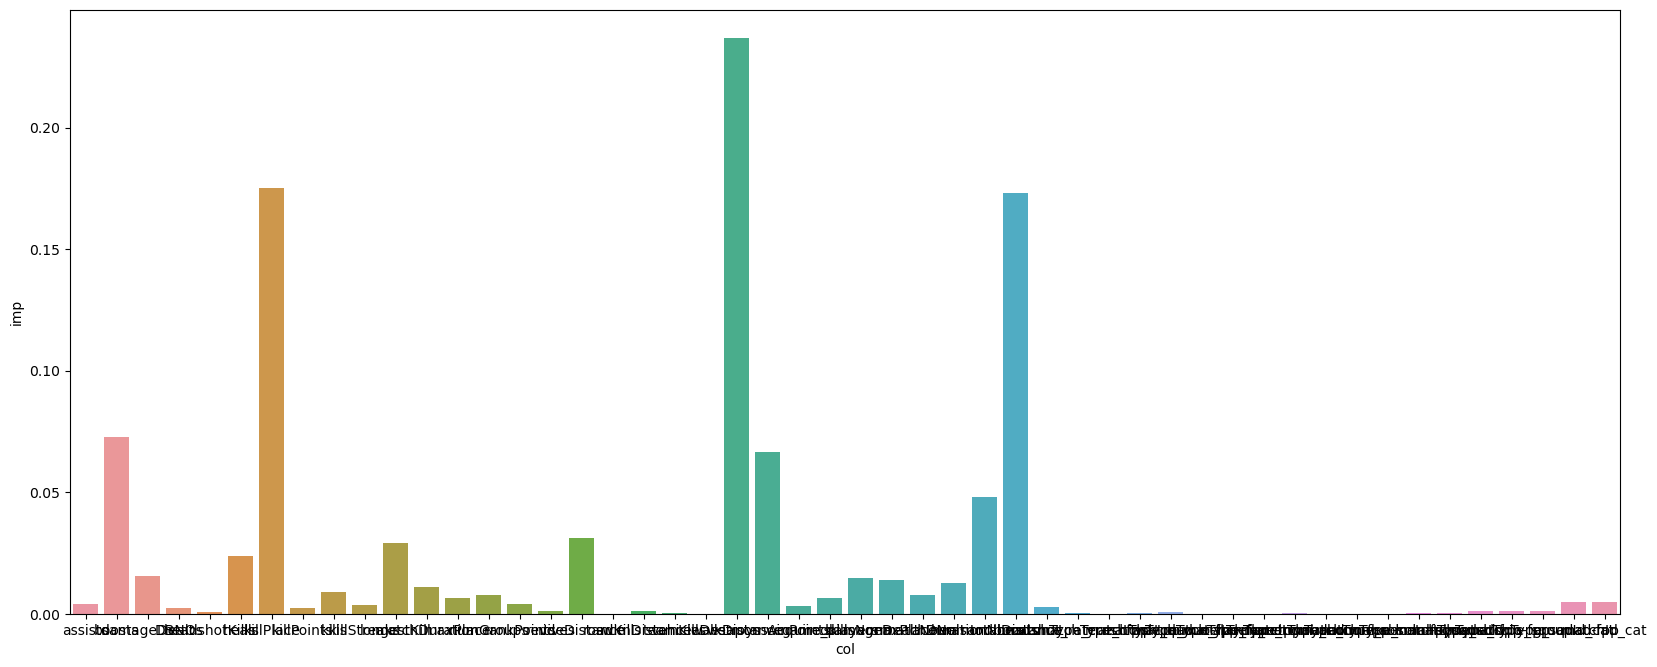

In [86]:
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(imp_df['col'],imp_df['imp'])

In [92]:
to_keep = imp_df[imp_df['imp']>0.005].col

In [93]:
to_keep.shape

(19,)

In [94]:
df_keep = x[to_keep]

In [95]:
df_keep.shape

(100000, 19)

In [96]:
x_train,x_test,y_train,y_test = train_test_split(df_keep,y,test_size=0.2,random_state=42)

In [97]:
rf1 = RandomForestRegressor(n_estimators=40, 
                           min_samples_leaf=3, 
                           max_features='sqrt',
                           n_jobs=-1)

In [98]:
rf1.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [99]:
rf1.score(x_test,y_test)

0.9121870420584487

In [100]:
y_pre = rf1.predict(x_test)

In [101]:
mean_absolute_error(y_test,y_pre)

0.06440436972294315

# 使用lightGBM对模型进行训练

In [102]:
import lightgbm as lgb

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [104]:
x_train.shape

(80000, 50)

# 模型初次尝试

In [105]:
gbn = lgb.LGBMRegressor(objective="regression", num_leaves=31, learning_rate=0.05, n_estimators=20)

In [106]:
gbn.fit(x_train,y_train,eval_set=[(x_test,y_test)],eval_metric='l1',early_stopping_rounds=5)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.258163	valid_0's l2: 0.0875563
[2]	valid_0's l1: 0.246963	valid_0's l2: 0.0803657
[3]	valid_0's l1: 0.236367	valid_0's l2: 0.073847
[4]	valid_0's l1: 0.226377	valid_0's l2: 0.0679647
[5]	valid_0's l1: 0.216924	valid_0's l2: 0.0626268
[6]	valid_0's l1: 0.208013	valid_0's l2: 0.0578049
[7]	valid_0's l1: 0.19965	valid_0's l2: 0.053454
[8]	valid_0's l1: 0.191659	valid_0's l2: 0.0494933
[9]	valid_0's l1: 0.18412	valid_0's l2: 0.0458819
[10]	valid_0's l1: 0.176992	valid_0's l2: 0.04261
[11]	valid_0's l1: 0.17029	valid_0's l2: 0.0396569
[12]	valid_0's l1: 0.163939	valid_0's l2: 0.0369713
[13]	valid_0's l1: 0.158047	valid_0's l2: 0.034563
[14]	valid_0's l1: 0.152327	valid_0's l2: 0.0322987
[15]	valid_0's l1: 0.146967	valid_0's l2: 0.0302567
[16]	valid_0's l1: 0.141975	valid_0's l2: 0.0284307
[17]	valid_0's l1: 0.13729	valid_0's l2: 0.0267678
[18]	valid_0's l1: 0.132892	valid_0's l2: 0.0252578
[19]	valid_0's l1: 0.128795	valid_0's l2: 0.023901
[20]	valid_0's l1: 0.124841	val

LGBMRegressor(learning_rate=0.05, n_estimators=20, objective='regression')

In [107]:
gbn.score(x_test,y_test)

0.7630989962652897

In [110]:
y_pre = gbn.predict(x_test, num_iteration=gbn.best_iteration_)

In [111]:
mean_absolute_error(y_test, y_pre)

0.12484090269715471

# 模型二次调优

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
estimator = lgb.LGBMRegressor(num_leaves=31)
param = {
    "learning_rate":[0.01, 0.1, 1],
    "n_estimators":[40, 60, 80, 100, 200, 300]
}
gbm = GridSearchCV(estimator,param_grid=param,cv=5,n_jobs=-1)
gbm.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [40, 60, 80, 100, 200, 300]})

In [114]:
gbm.score(x_test,y_test)

0.9316028148901355

In [115]:
y_pre = gbm.predict(x_test)

In [116]:
mean_absolute_error(y_test,y_pre)

0.057569984242944225

# 模型三次调优

In [117]:
scores = []
n_estimators = [100, 300, 500, 800]
for nes in n_estimators:
    lgbm = lgb.LGBMRegressor(boosting_type='gbdt', 
                      num_leaves=31,
                      max_depth=5,
                      learning_rate=0.1,
                      n_estimators=nes,
                      min_child_samples=20,
                      n_jobs=-1)
    lgbm.fit(x_train,y_train,eval_set=[(x_test,y_test)],eval_metric='l1',early_stopping_rounds=5)
    
    y_pre =lgbm.predict(x_test)
    score = mean_absolute_error(y_test,y_pre)
    scores.append(score)
    print('本次结果的mea值为：\n',score)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.246822	valid_0's l2: 0.0802423
[2]	valid_0's l1: 0.22616	valid_0's l2: 0.067818
[3]	valid_0's l1: 0.20786	valid_0's l2: 0.0577375
[4]	valid_0's l1: 0.191566	valid_0's l2: 0.0495289
[5]	valid_0's l1: 0.176975	valid_0's l2: 0.0427594
[6]	valid_0's l1: 0.164224	valid_0's l2: 0.0372395
[7]	valid_0's l1: 0.152885	valid_0's l2: 0.0326935
[8]	valid_0's l1: 0.142859	valid_0's l2: 0.0289827
[9]	valid_0's l1: 0.133548	valid_0's l2: 0.0257053
[10]	valid_0's l1: 0.12541	valid_0's l2: 0.0230151
[11]	valid_0's l1: 0.118629	valid_0's l2: 0.0209656
[12]	valid_0's l1: 0.112098	valid_0's l2: 0.019042
[13]	valid_0's l1: 0.106957	valid_0's l2: 0.0176632
[14]	valid_0's l1: 0.101873	valid_0's l2: 0.016306
[15]	valid_0's l1: 0.0976248	valid_0's l2: 0.0152842
[16]	valid_0's l1: 0.0936106	valid_0's l2: 0.0143189
[17]	valid_0's l1: 0.0901748	valid_0's l2: 0.0135276
[18]	valid_0's l1: 0.0870773	valid_0's l2: 0.0128255
[19]	valid_0's l1: 0.0844315	valid_0's l2: 0.0122736
[20]	valid_0's l1: 0.0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.246822	valid_0's l2: 0.0802423
[2]	valid_0's l1: 0.22616	valid_0's l2: 0.067818
[3]	valid_0's l1: 0.20786	valid_0's l2: 0.0577375
[4]	valid_0's l1: 0.191566	valid_0's l2: 0.0495289
[5]	valid_0's l1: 0.176975	valid_0's l2: 0.0427594
[6]	valid_0's l1: 0.164224	valid_0's l2: 0.0372395
[7]	valid_0's l1: 0.152885	valid_0's l2: 0.0326935
[8]	valid_0's l1: 0.142859	valid_0's l2: 0.0289827
[9]	valid_0's l1: 0.133548	valid_0's l2: 0.0257053
[10]	valid_0's l1: 0.12541	valid_0's l2: 0.0230151
[11]	valid_0's l1: 0.118629	valid_0's l2: 0.0209656
[12]	valid_0's l1: 0.112098	valid_0's l2: 0.019042
[13]	valid_0's l1: 0.106957	valid_0's l2: 0.0176632
[14]	valid_0's l1: 0.101873	valid_0's l2: 0.016306
[15]	valid_0's l1: 0.0976248	valid_0's l2: 0.0152842
[16]	valid_0's l1: 0.0936106	valid_0's l2: 0.0143189
[17]	valid_0's l1: 0.0901748	valid_0's l2: 0.0135276
[18]	valid_0's l1: 0.0870773	valid_0's l2: 0.0128255
[19]	valid_0's l1: 0.0844315	valid_0's l2: 0.0122736
[20]	valid_0's l1: 0.0

[162]	valid_0's l1: 0.0587866	valid_0's l2: 0.00688908
[163]	valid_0's l1: 0.0587787	valid_0's l2: 0.00688829
[164]	valid_0's l1: 0.0587737	valid_0's l2: 0.00688723
[165]	valid_0's l1: 0.0587666	valid_0's l2: 0.00688613
[166]	valid_0's l1: 0.0587635	valid_0's l2: 0.00688551
[167]	valid_0's l1: 0.0587402	valid_0's l2: 0.00687613
[168]	valid_0's l1: 0.0586913	valid_0's l2: 0.00686287
[169]	valid_0's l1: 0.0586544	valid_0's l2: 0.00685847
[170]	valid_0's l1: 0.0586513	valid_0's l2: 0.00685738
[171]	valid_0's l1: 0.0586212	valid_0's l2: 0.00684235
[172]	valid_0's l1: 0.05861	valid_0's l2: 0.00683942
[173]	valid_0's l1: 0.0585924	valid_0's l2: 0.00683519
[174]	valid_0's l1: 0.0585846	valid_0's l2: 0.00683433
[175]	valid_0's l1: 0.0585772	valid_0's l2: 0.00683343
[176]	valid_0's l1: 0.0585771	valid_0's l2: 0.00683256
[177]	valid_0's l1: 0.0585699	valid_0's l2: 0.0068301
[178]	valid_0's l1: 0.0585652	valid_0's l2: 0.00682852
[179]	valid_0's l1: 0.0585599	valid_0's l2: 0.00682747
[180]	valid_0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.246822	valid_0's l2: 0.0802423
[2]	valid_0's l1: 0.22616	valid_0's l2: 0.067818
[3]	valid_0's l1: 0.20786	valid_0's l2: 0.0577375
[4]	valid_0's l1: 0.191566	valid_0's l2: 0.0495289
[5]	valid_0's l1: 0.176975	valid_0's l2: 0.0427594
[6]	valid_0's l1: 0.164224	valid_0's l2: 0.0372395
[7]	valid_0's l1: 0.152885	valid_0's l2: 0.0326935
[8]	valid_0's l1: 0.142859	valid_0's l2: 0.0289827
[9]	valid_0's l1: 0.133548	valid_0's l2: 0.0257053
[10]	valid_0's l1: 0.12541	valid_0's l2: 0.0230151
[11]	valid_0's l1: 0.118629	valid_0's l2: 0.0209656
[12]	valid_0's l1: 0.112098	valid_0's l2: 0.019042
[13]	valid_0's l1: 0.106957	valid_0's l2: 0.0176632
[14]	valid_0's l1: 0.101873	valid_0's l2: 0.016306
[15]	valid_0's l1: 0.0976248	valid_0's l2: 0.0152842
[16]	valid_0's l1: 0.0936106	valid_0's l2: 0.0143189
[17]	valid_0's l1: 0.0901748	valid_0's l2: 0.0135276
[18]	valid_0's l1: 0.0870773	valid_0's l2: 0.0128255
[19]	valid_0's l1: 0.0844315	valid_0's l2: 0.0122736
[20]	valid_0's l1: 0.0

[158]	valid_0's l1: 0.0588161	valid_0's l2: 0.00689913
[159]	valid_0's l1: 0.0588147	valid_0's l2: 0.00689736
[160]	valid_0's l1: 0.0588119	valid_0's l2: 0.00689721
[161]	valid_0's l1: 0.0587917	valid_0's l2: 0.00689034
[162]	valid_0's l1: 0.0587866	valid_0's l2: 0.00688908
[163]	valid_0's l1: 0.0587787	valid_0's l2: 0.00688829
[164]	valid_0's l1: 0.0587737	valid_0's l2: 0.00688723
[165]	valid_0's l1: 0.0587666	valid_0's l2: 0.00688613
[166]	valid_0's l1: 0.0587635	valid_0's l2: 0.00688551
[167]	valid_0's l1: 0.0587402	valid_0's l2: 0.00687613
[168]	valid_0's l1: 0.0586913	valid_0's l2: 0.00686287
[169]	valid_0's l1: 0.0586544	valid_0's l2: 0.00685847
[170]	valid_0's l1: 0.0586513	valid_0's l2: 0.00685738
[171]	valid_0's l1: 0.0586212	valid_0's l2: 0.00684235
[172]	valid_0's l1: 0.05861	valid_0's l2: 0.00683942
[173]	valid_0's l1: 0.0585924	valid_0's l2: 0.00683519
[174]	valid_0's l1: 0.0585846	valid_0's l2: 0.00683433
[175]	valid_0's l1: 0.0585772	valid_0's l2: 0.00683343
[176]	valid_

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.246822	valid_0's l2: 0.0802423
[2]	valid_0's l1: 0.22616	valid_0's l2: 0.067818
[3]	valid_0's l1: 0.20786	valid_0's l2: 0.0577375
[4]	valid_0's l1: 0.191566	valid_0's l2: 0.0495289
[5]	valid_0's l1: 0.176975	valid_0's l2: 0.0427594
[6]	valid_0's l1: 0.164224	valid_0's l2: 0.0372395
[7]	valid_0's l1: 0.152885	valid_0's l2: 0.0326935
[8]	valid_0's l1: 0.142859	valid_0's l2: 0.0289827
[9]	valid_0's l1: 0.133548	valid_0's l2: 0.0257053
[10]	valid_0's l1: 0.12541	valid_0's l2: 0.0230151
[11]	valid_0's l1: 0.118629	valid_0's l2: 0.0209656
[12]	valid_0's l1: 0.112098	valid_0's l2: 0.019042
[13]	valid_0's l1: 0.106957	valid_0's l2: 0.0176632
[14]	valid_0's l1: 0.101873	valid_0's l2: 0.016306
[15]	valid_0's l1: 0.0976248	valid_0's l2: 0.0152842
[16]	valid_0's l1: 0.0936106	valid_0's l2: 0.0143189
[17]	valid_0's l1: 0.0901748	valid_0's l2: 0.0135276
[18]	valid_0's l1: 0.0870773	valid_0's l2: 0.0128255
[19]	valid_0's l1: 0.0844315	valid_0's l2: 0.0122736
[20]	valid_0's l1: 0.0

[169]	valid_0's l1: 0.0586544	valid_0's l2: 0.00685847
[170]	valid_0's l1: 0.0586513	valid_0's l2: 0.00685738
[171]	valid_0's l1: 0.0586212	valid_0's l2: 0.00684235
[172]	valid_0's l1: 0.05861	valid_0's l2: 0.00683942
[173]	valid_0's l1: 0.0585924	valid_0's l2: 0.00683519
[174]	valid_0's l1: 0.0585846	valid_0's l2: 0.00683433
[175]	valid_0's l1: 0.0585772	valid_0's l2: 0.00683343
[176]	valid_0's l1: 0.0585771	valid_0's l2: 0.00683256
[177]	valid_0's l1: 0.0585699	valid_0's l2: 0.0068301
[178]	valid_0's l1: 0.0585652	valid_0's l2: 0.00682852
[179]	valid_0's l1: 0.0585599	valid_0's l2: 0.00682747
[180]	valid_0's l1: 0.0585355	valid_0's l2: 0.00682122
[181]	valid_0's l1: 0.0585071	valid_0's l2: 0.00681532
[182]	valid_0's l1: 0.0584731	valid_0's l2: 0.00680439
[183]	valid_0's l1: 0.0584716	valid_0's l2: 0.00680281
[184]	valid_0's l1: 0.0584695	valid_0's l2: 0.00680169
[185]	valid_0's l1: 0.0584524	valid_0's l2: 0.00679685
[186]	valid_0's l1: 0.0584507	valid_0's l2: 0.00679664
[187]	valid_0

best n_estimator 300


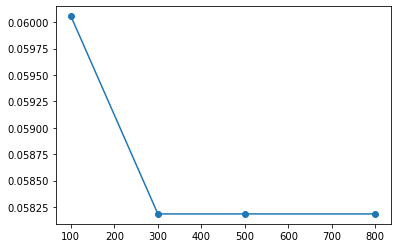

In [120]:
plt.plot(n_estimators,scores,'o-')

print("best n_estimator {}".format(n_estimators[np.argmin(scores)]))

In [122]:
# max_depth

scores = []
max_depth = [3, 5, 7, 9, 11]

for md in  max_depth:
    lgbm = lgb.LGBMRegressor(boosting_type='gbdt', 
                      num_leaves=31,
                      max_depth=md,
                      learning_rate=0.1,
                      n_estimators=300,
                      min_child_samples=20,
                      n_jobs=-1)
    
    lgbm.fit(x_train, y_train, eval_set=[(x_test, y_test)], eval_metric="l1", early_stopping_rounds=5)
    
    y_pre = lgbm.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pre)
    
    scores.append(mae)
    print("本次结果输出的mae值是:\n", mae)

[1]	valid_0's l1: 0.248164	valid_0's l2: 0.0810309
[2]	valid_0's l1: 0.228727	valid_0's l2: 0.0692444
[3]	valid_0's l1: 0.211547	valid_0's l2: 0.0596823
[4]	valid_0's l1: 0.196129	valid_0's l2: 0.0518255
[5]	valid_0's l1: 0.182737	valid_0's l2: 0.0454522
[6]	valid_0's l1: 0.170728	valid_0's l2: 0.0401887
[7]	valid_0's l1: 0.160047	valid_0's l2: 0.0358158
[8]	valid_0's l1: 0.150905	valid_0's l2: 0.0323015
[9]	valid_0's l1: 0.14266	valid_0's l2: 0.0293584
[10]	valid_0's l1: 0.135291	valid_0's l2: 0.0268805
[11]	valid_0's l1: 0.128724	valid_0's l2: 0.024811
[12]	valid_0's l1: 0.12308	valid_0's l2: 0.0231062
[13]	valid_0's l1: 0.117996	valid_0's l2: 0.0216496
[14]	valid_0's l1: 0.113418	valid_0's l2: 0.0204136
[15]	valid_0's l1: 0.109577	valid_0's l2: 0.0193976
[16]	valid_0's l1: 0.106128	valid_0's l2: 0.0185581
[17]	valid_0's l1: 0.103038	valid_0's l2: 0.0178014
[18]	valid_0's l1: 0.100565	valid_0's l2: 0.0171763
[19]	valid_0's l1: 0.0979032	valid_0's l2: 0.0165185
[20]	valid_0's l1: 0.09

[163]	valid_0's l1: 0.0642376	valid_0's l2: 0.00837574
[164]	valid_0's l1: 0.0641585	valid_0's l2: 0.0083573
[165]	valid_0's l1: 0.0641132	valid_0's l2: 0.00833402
[166]	valid_0's l1: 0.0640431	valid_0's l2: 0.00831618
[167]	valid_0's l1: 0.0640346	valid_0's l2: 0.00831008
[168]	valid_0's l1: 0.0639685	valid_0's l2: 0.00829314
[169]	valid_0's l1: 0.0639547	valid_0's l2: 0.0082876
[170]	valid_0's l1: 0.0639474	valid_0's l2: 0.00828814
[171]	valid_0's l1: 0.0639289	valid_0's l2: 0.00828395
[172]	valid_0's l1: 0.0638765	valid_0's l2: 0.00827044
[173]	valid_0's l1: 0.0638165	valid_0's l2: 0.0082483
[174]	valid_0's l1: 0.0638116	valid_0's l2: 0.00824477
[175]	valid_0's l1: 0.0637947	valid_0's l2: 0.00824098
[176]	valid_0's l1: 0.063739	valid_0's l2: 0.00822684
[177]	valid_0's l1: 0.0637221	valid_0's l2: 0.00822455
[178]	valid_0's l1: 0.0637077	valid_0's l2: 0.00821996
[179]	valid_0's l1: 0.0636987	valid_0's l2: 0.00821508
[180]	valid_0's l1: 0.0635991	valid_0's l2: 0.00817978
[181]	valid_0'

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.246822	valid_0's l2: 0.0802423
[2]	valid_0's l1: 0.22616	valid_0's l2: 0.067818
[3]	valid_0's l1: 0.20786	valid_0's l2: 0.0577375
[4]	valid_0's l1: 0.191566	valid_0's l2: 0.0495289
[5]	valid_0's l1: 0.176975	valid_0's l2: 0.0427594
[6]	valid_0's l1: 0.164224	valid_0's l2: 0.0372395
[7]	valid_0's l1: 0.152885	valid_0's l2: 0.0326935
[8]	valid_0's l1: 0.142859	valid_0's l2: 0.0289827
[9]	valid_0's l1: 0.133548	valid_0's l2: 0.0257053
[10]	valid_0's l1: 0.12541	valid_0's l2: 0.0230151
[11]	valid_0's l1: 0.118629	valid_0's l2: 0.0209656
[12]	valid_0's l1: 0.112098	valid_0's l2: 0.019042
[13]	valid_0's l1: 0.106957	valid_0's l2: 0.0176632
[14]	valid_0's l1: 0.101873	valid_0's l2: 0.016306
[15]	valid_0's l1: 0.0976248	valid_0's l2: 0.0152842
[16]	valid_0's l1: 0.0936106	valid_0's l2: 0.0143189
[17]	valid_0's l1: 0.0901748	valid_0's l2: 0.0135276
[18]	valid_0's l1: 0.0870773	valid_0's l2: 0.0128255
[19]	valid_0's l1: 0.0844315	valid_0's l2: 0.0122736
[20]	valid_0's l1: 0.0

[177]	valid_0's l1: 0.0585699	valid_0's l2: 0.0068301
[178]	valid_0's l1: 0.0585652	valid_0's l2: 0.00682852
[179]	valid_0's l1: 0.0585599	valid_0's l2: 0.00682747
[180]	valid_0's l1: 0.0585355	valid_0's l2: 0.00682122
[181]	valid_0's l1: 0.0585071	valid_0's l2: 0.00681532
[182]	valid_0's l1: 0.0584731	valid_0's l2: 0.00680439
[183]	valid_0's l1: 0.0584716	valid_0's l2: 0.00680281
[184]	valid_0's l1: 0.0584695	valid_0's l2: 0.00680169
[185]	valid_0's l1: 0.0584524	valid_0's l2: 0.00679685
[186]	valid_0's l1: 0.0584507	valid_0's l2: 0.00679664
[187]	valid_0's l1: 0.0584504	valid_0's l2: 0.00679595
[188]	valid_0's l1: 0.0584469	valid_0's l2: 0.00679491
[189]	valid_0's l1: 0.0584448	valid_0's l2: 0.00679451
[190]	valid_0's l1: 0.0584376	valid_0's l2: 0.00679266
[191]	valid_0's l1: 0.0584303	valid_0's l2: 0.00679001
[192]	valid_0's l1: 0.058399	valid_0's l2: 0.00678398
[193]	valid_0's l1: 0.0584007	valid_0's l2: 0.00678407
[194]	valid_0's l1: 0.0584011	valid_0's l2: 0.00678256
[195]	valid_

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.246474	valid_0's l2: 0.0800412
[2]	valid_0's l1: 0.225413	valid_0's l2: 0.0673729
[3]	valid_0's l1: 0.206707	valid_0's l2: 0.0570986
[4]	valid_0's l1: 0.190297	valid_0's l2: 0.0488088
[5]	valid_0's l1: 0.175385	valid_0's l2: 0.0418798
[6]	valid_0's l1: 0.162229	valid_0's l2: 0.0362416
[7]	valid_0's l1: 0.150612	valid_0's l2: 0.0316505
[8]	valid_0's l1: 0.140185	valid_0's l2: 0.0277745
[9]	valid_0's l1: 0.131184	valid_0's l2: 0.0246839
[10]	valid_0's l1: 0.123163	valid_0's l2: 0.022113
[11]	valid_0's l1: 0.116033	valid_0's l2: 0.0199639
[12]	valid_0's l1: 0.109932	valid_0's l2: 0.0182337
[13]	valid_0's l1: 0.104394	valid_0's l2: 0.0167549
[14]	valid_0's l1: 0.0996302	valid_0's l2: 0.0155525
[15]	valid_0's l1: 0.0951622	valid_0's l2: 0.0144405
[16]	valid_0's l1: 0.0912433	valid_0's l2: 0.0135026
[17]	valid_0's l1: 0.087974	valid_0's l2: 0.0127867
[18]	valid_0's l1: 0.084912	valid_0's l2: 0.0120887
[19]	valid_0's l1: 0.0824844	valid_0's l2: 0.0115961
[20]	valid_0's l1:

[155]	valid_0's l1: 0.0582659	valid_0's l2: 0.00669355
[156]	valid_0's l1: 0.058264	valid_0's l2: 0.00669335
[157]	valid_0's l1: 0.0582574	valid_0's l2: 0.00669187
[158]	valid_0's l1: 0.0582555	valid_0's l2: 0.00668932
[159]	valid_0's l1: 0.0582366	valid_0's l2: 0.00668389
[160]	valid_0's l1: 0.0582332	valid_0's l2: 0.00668349
[161]	valid_0's l1: 0.0582277	valid_0's l2: 0.00668323
[162]	valid_0's l1: 0.0582292	valid_0's l2: 0.0066831
[163]	valid_0's l1: 0.0582283	valid_0's l2: 0.00668311
[164]	valid_0's l1: 0.0582172	valid_0's l2: 0.00668078
[165]	valid_0's l1: 0.0582099	valid_0's l2: 0.00667971
[166]	valid_0's l1: 0.058202	valid_0's l2: 0.00667831
[167]	valid_0's l1: 0.0582096	valid_0's l2: 0.00668033
[168]	valid_0's l1: 0.0582124	valid_0's l2: 0.00668149
[169]	valid_0's l1: 0.0581946	valid_0's l2: 0.00667607
[170]	valid_0's l1: 0.0581751	valid_0's l2: 0.00667093
[171]	valid_0's l1: 0.0581721	valid_0's l2: 0.00667059
[172]	valid_0's l1: 0.0581451	valid_0's l2: 0.00666535
[173]	valid_0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.246413	valid_0's l2: 0.0800228
[2]	valid_0's l1: 0.225362	valid_0's l2: 0.0673633
[3]	valid_0's l1: 0.206657	valid_0's l2: 0.0570784
[4]	valid_0's l1: 0.189953	valid_0's l2: 0.0486579
[5]	valid_0's l1: 0.175086	valid_0's l2: 0.0417724
[6]	valid_0's l1: 0.161966	valid_0's l2: 0.0361349
[7]	valid_0's l1: 0.150356	valid_0's l2: 0.0315448
[8]	valid_0's l1: 0.140093	valid_0's l2: 0.0277648
[9]	valid_0's l1: 0.130997	valid_0's l2: 0.0246072
[10]	valid_0's l1: 0.123067	valid_0's l2: 0.0220633
[11]	valid_0's l1: 0.116008	valid_0's l2: 0.0199392
[12]	valid_0's l1: 0.109922	valid_0's l2: 0.0182124
[13]	valid_0's l1: 0.104306	valid_0's l2: 0.0166846
[14]	valid_0's l1: 0.099651	valid_0's l2: 0.0155183
[15]	valid_0's l1: 0.0951364	valid_0's l2: 0.0143733
[16]	valid_0's l1: 0.0913209	valid_0's l2: 0.0134917
[17]	valid_0's l1: 0.0878805	valid_0's l2: 0.0126826
[18]	valid_0's l1: 0.0849342	valid_0's l2: 0.0120432
[19]	valid_0's l1: 0.0824884	valid_0's l2: 0.0115577
[20]	valid_0's l

[172]	valid_0's l1: 0.0580986	valid_0's l2: 0.00662678
[173]	valid_0's l1: 0.058097	valid_0's l2: 0.00662619
[174]	valid_0's l1: 0.0580951	valid_0's l2: 0.00662355
[175]	valid_0's l1: 0.0580903	valid_0's l2: 0.00662348
[176]	valid_0's l1: 0.0580978	valid_0's l2: 0.00662455
[177]	valid_0's l1: 0.058088	valid_0's l2: 0.00662321
[178]	valid_0's l1: 0.0580693	valid_0's l2: 0.00662041
[179]	valid_0's l1: 0.0580603	valid_0's l2: 0.00661823
[180]	valid_0's l1: 0.0580613	valid_0's l2: 0.00661885
[181]	valid_0's l1: 0.0580439	valid_0's l2: 0.00661588
[182]	valid_0's l1: 0.0580484	valid_0's l2: 0.00661713
[183]	valid_0's l1: 0.0580458	valid_0's l2: 0.0066173
[184]	valid_0's l1: 0.0580178	valid_0's l2: 0.00661084
[185]	valid_0's l1: 0.0580192	valid_0's l2: 0.00661081
[186]	valid_0's l1: 0.0580201	valid_0's l2: 0.00661044
[187]	valid_0's l1: 0.0580179	valid_0's l2: 0.00660956
[188]	valid_0's l1: 0.0580054	valid_0's l2: 0.00660767
[189]	valid_0's l1: 0.0580066	valid_0's l2: 0.00660794
[190]	valid_0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.246413	valid_0's l2: 0.0800228
[2]	valid_0's l1: 0.225362	valid_0's l2: 0.0673633
[3]	valid_0's l1: 0.206657	valid_0's l2: 0.0570784
[4]	valid_0's l1: 0.189953	valid_0's l2: 0.0486579
[5]	valid_0's l1: 0.175086	valid_0's l2: 0.0417724
[6]	valid_0's l1: 0.161966	valid_0's l2: 0.0361349
[7]	valid_0's l1: 0.150356	valid_0's l2: 0.0315448
[8]	valid_0's l1: 0.140093	valid_0's l2: 0.0277648
[9]	valid_0's l1: 0.130997	valid_0's l2: 0.0246072
[10]	valid_0's l1: 0.123067	valid_0's l2: 0.0220633
[11]	valid_0's l1: 0.116008	valid_0's l2: 0.0199392
[12]	valid_0's l1: 0.109922	valid_0's l2: 0.0182124
[13]	valid_0's l1: 0.104306	valid_0's l2: 0.0166846
[14]	valid_0's l1: 0.099655	valid_0's l2: 0.0155196
[15]	valid_0's l1: 0.0952332	valid_0's l2: 0.0144092
[16]	valid_0's l1: 0.0914524	valid_0's l2: 0.0135378
[17]	valid_0's l1: 0.0879986	valid_0's l2: 0.012725
[18]	valid_0's l1: 0.0848681	valid_0's l2: 0.0120302
[19]	valid_0's l1: 0.0824436	valid_0's l2: 0.0115449
[20]	valid_0's l1

[175]	valid_0's l1: 0.0580331	valid_0's l2: 0.00661219
[176]	valid_0's l1: 0.0580291	valid_0's l2: 0.0066119
[177]	valid_0's l1: 0.0580319	valid_0's l2: 0.00661277
[178]	valid_0's l1: 0.0580146	valid_0's l2: 0.00661045
[179]	valid_0's l1: 0.0579995	valid_0's l2: 0.00660613
[180]	valid_0's l1: 0.0579973	valid_0's l2: 0.00660649
[181]	valid_0's l1: 0.0579869	valid_0's l2: 0.00660176
[182]	valid_0's l1: 0.0579795	valid_0's l2: 0.00659824
[183]	valid_0's l1: 0.0579822	valid_0's l2: 0.00659772
[184]	valid_0's l1: 0.0579689	valid_0's l2: 0.00659532
[185]	valid_0's l1: 0.0579651	valid_0's l2: 0.00659445
[186]	valid_0's l1: 0.0579637	valid_0's l2: 0.00659425
[187]	valid_0's l1: 0.0579339	valid_0's l2: 0.00659016
[188]	valid_0's l1: 0.0579324	valid_0's l2: 0.00659017
[189]	valid_0's l1: 0.057934	valid_0's l2: 0.00658928
[190]	valid_0's l1: 0.0579327	valid_0's l2: 0.00658919
[191]	valid_0's l1: 0.0579232	valid_0's l2: 0.00658844
[192]	valid_0's l1: 0.0579206	valid_0's l2: 0.00658811
[193]	valid_

best max_depth 7


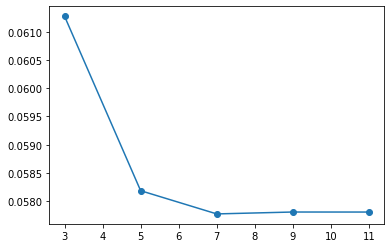

In [123]:
plt.plot(max_depth,scores,'o-')

print("best max_depth {}".format(max_depth[np.argmin(scores)]))

In [147]:
# max_depth

scores = []
learn = [0.001,0.005,0.01,0.05,0.1]

for lea in  learn:
    lgbm = lgb.LGBMRegressor(boosting_type='gbdt', 
                      num_leaves=31,
                      max_depth=7,
                      learning_rate=lea,
                      n_estimators=300,
                      min_child_samples=20,
                      n_jobs=-1)
    
    lgbm.fit(x_train, y_train, eval_set=[(x_test, y_test)], eval_metric="l1", early_stopping_rounds=5)
    
    y_pre = lgbm.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pre)
    
    scores.append(mae)
    print("本次结果输出的mae值是:\n", mae)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.269771	valid_0's l2: 0.0953344
[2]	valid_0's l1: 0.269535	valid_0's l2: 0.0951721
[3]	valid_0's l1: 0.269298	valid_0's l2: 0.0950101
[4]	valid_0's l1: 0.269061	valid_0's l2: 0.0948481
[5]	valid_0's l1: 0.268825	valid_0's l2: 0.0946868
[6]	valid_0's l1: 0.268589	valid_0's l2: 0.0945254
[7]	valid_0's l1: 0.268353	valid_0's l2: 0.0943648
[8]	valid_0's l1: 0.268117	valid_0's l2: 0.0942041
[9]	valid_0's l1: 0.267882	valid_0's l2: 0.094044
[10]	valid_0's l1: 0.267647	valid_0's l2: 0.0938843
[11]	valid_0's l1: 0.267412	valid_0's l2: 0.0937246
[12]	valid_0's l1: 0.267178	valid_0's l2: 0.0935655
[13]	valid_0's l1: 0.266943	valid_0's l2: 0.0934063
[14]	valid_0's l1: 0.266709	valid_0's l2: 0.0932479
[15]	valid_0's l1: 0.266474	valid_0's l2: 0.0930892
[16]	valid_0's l1: 0.266241	valid_0's l2: 0.0929311
[17]	valid_0's l1: 0.266007	valid_0's l2: 0.0927731
[18]	valid_0's l1: 0.265773	valid_0's l2: 0.0926157
[19]	valid_0's l1: 0.26554	valid_0's l2: 0.0924583
[20]	valid_0's l1: 0.26

[161]	valid_0's l1: 0.234958	valid_0's l2: 0.0729873
[162]	valid_0's l1: 0.234759	valid_0's l2: 0.0728682
[163]	valid_0's l1: 0.234561	valid_0's l2: 0.0727495
[164]	valid_0's l1: 0.234362	valid_0's l2: 0.0726306
[165]	valid_0's l1: 0.234165	valid_0's l2: 0.0725127
[166]	valid_0's l1: 0.233967	valid_0's l2: 0.0723944
[167]	valid_0's l1: 0.233769	valid_0's l2: 0.0722769
[168]	valid_0's l1: 0.233572	valid_0's l2: 0.0721592
[169]	valid_0's l1: 0.233375	valid_0's l2: 0.0720421
[170]	valid_0's l1: 0.233178	valid_0's l2: 0.0719249
[171]	valid_0's l1: 0.232981	valid_0's l2: 0.0718082
[172]	valid_0's l1: 0.232785	valid_0's l2: 0.0716912
[173]	valid_0's l1: 0.232589	valid_0's l2: 0.0715751
[174]	valid_0's l1: 0.232393	valid_0's l2: 0.0714585
[175]	valid_0's l1: 0.232198	valid_0's l2: 0.0713429
[176]	valid_0's l1: 0.232002	valid_0's l2: 0.071227
[177]	valid_0's l1: 0.231807	valid_0's l2: 0.0711118
[178]	valid_0's l1: 0.231612	valid_0's l2: 0.0709962
[179]	valid_0's l1: 0.231417	valid_0's l2: 0.07

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.268824	valid_0's l2: 0.0946856
[2]	valid_0's l1: 0.267641	valid_0's l2: 0.0938804
[3]	valid_0's l1: 0.266469	valid_0's l2: 0.093085
[4]	valid_0's l1: 0.265296	valid_0's l2: 0.0922944
[5]	valid_0's l1: 0.264136	valid_0's l2: 0.0915143
[6]	valid_0's l1: 0.262978	valid_0's l2: 0.0907394
[7]	valid_0's l1: 0.261833	valid_0's l2: 0.0899752
[8]	valid_0's l1: 0.260689	valid_0's l2: 0.0892157
[9]	valid_0's l1: 0.259555	valid_0's l2: 0.0884654
[10]	valid_0's l1: 0.258423	valid_0's l2: 0.0877204
[11]	valid_0's l1: 0.257304	valid_0's l2: 0.0869858
[12]	valid_0's l1: 0.256186	valid_0's l2: 0.0862557
[13]	valid_0's l1: 0.25508	valid_0's l2: 0.0855357
[14]	valid_0's l1: 0.253975	valid_0's l2: 0.0848205
[15]	valid_0's l1: 0.252881	valid_0's l2: 0.0841146
[16]	valid_0's l1: 0.251786	valid_0's l2: 0.0834123
[17]	valid_0's l1: 0.250701	valid_0's l2: 0.082717
[18]	valid_0's l1: 0.249619	valid_0's l2: 0.0820295
[19]	valid_0's l1: 0.248545	valid_0's l2: 0.0813479
[20]	valid_0's l1: 0.247

[162]	valid_0's l1: 0.143017	valid_0's l2: 0.0287724
[163]	valid_0's l1: 0.142543	valid_0's l2: 0.0286013
[164]	valid_0's l1: 0.142065	valid_0's l2: 0.0284296
[165]	valid_0's l1: 0.141597	valid_0's l2: 0.0282616
[166]	valid_0's l1: 0.141121	valid_0's l2: 0.0280899
[167]	valid_0's l1: 0.140659	valid_0's l2: 0.0279254
[168]	valid_0's l1: 0.140197	valid_0's l2: 0.0277605
[169]	valid_0's l1: 0.139738	valid_0's l2: 0.0275982
[170]	valid_0's l1: 0.139275	valid_0's l2: 0.0274341
[171]	valid_0's l1: 0.138824	valid_0's l2: 0.0272754
[172]	valid_0's l1: 0.138377	valid_0's l2: 0.0271179
[173]	valid_0's l1: 0.137929	valid_0's l2: 0.0269615
[174]	valid_0's l1: 0.137481	valid_0's l2: 0.0268048
[175]	valid_0's l1: 0.137028	valid_0's l2: 0.0266463
[176]	valid_0's l1: 0.136587	valid_0's l2: 0.0264935
[177]	valid_0's l1: 0.136152	valid_0's l2: 0.0263431
[178]	valid_0's l1: 0.135721	valid_0's l2: 0.0261953
[179]	valid_0's l1: 0.135277	valid_0's l2: 0.0260421
[180]	valid_0's l1: 0.134844	valid_0's l2: 0.0

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.267639	valid_0's l2: 0.0938783
[2]	valid_0's l1: 0.265286	valid_0's l2: 0.0922879
[3]	valid_0's l1: 0.262966	valid_0's l2: 0.0907303
[4]	valid_0's l1: 0.260668	valid_0's l2: 0.0892006
[5]	valid_0's l1: 0.258404	valid_0's l2: 0.0877052
[6]	valid_0's l1: 0.256153	valid_0's l2: 0.0862347
[7]	valid_0's l1: 0.25394	valid_0's l2: 0.0847984
[8]	valid_0's l1: 0.251737	valid_0's l2: 0.0833827
[9]	valid_0's l1: 0.249567	valid_0's l2: 0.0819962
[10]	valid_0's l1: 0.247417	valid_0's l2: 0.0806398
[11]	valid_0's l1: 0.245289	valid_0's l2: 0.0793041
[12]	valid_0's l1: 0.243185	valid_0's l2: 0.077996
[13]	valid_0's l1: 0.241115	valid_0's l2: 0.0767187
[14]	valid_0's l1: 0.239059	valid_0's l2: 0.0754615
[15]	valid_0's l1: 0.237021	valid_0's l2: 0.0742263
[16]	valid_0's l1: 0.235021	valid_0's l2: 0.0730233
[17]	valid_0's l1: 0.233026	valid_0's l2: 0.0718356
[18]	valid_0's l1: 0.231064	valid_0's l2: 0.070676
[19]	valid_0's l1: 0.229119	valid_0's l2: 0.0695353
[20]	valid_0's l1: 0.227

[165]	valid_0's l1: 0.0920499	valid_0's l2: 0.0136465
[166]	valid_0's l1: 0.0917073	valid_0's l2: 0.0135678
[167]	valid_0's l1: 0.0913652	valid_0's l2: 0.01349
[168]	valid_0's l1: 0.0910229	valid_0's l2: 0.0134097
[169]	valid_0's l1: 0.090691	valid_0's l2: 0.0133353
[170]	valid_0's l1: 0.0903514	valid_0's l2: 0.0132575
[171]	valid_0's l1: 0.0900206	valid_0's l2: 0.0131808
[172]	valid_0's l1: 0.0896986	valid_0's l2: 0.0131096
[173]	valid_0's l1: 0.0893858	valid_0's l2: 0.0130415
[174]	valid_0's l1: 0.0890699	valid_0's l2: 0.0129716
[175]	valid_0's l1: 0.0887583	valid_0's l2: 0.0129009
[176]	valid_0's l1: 0.0884552	valid_0's l2: 0.0128356
[177]	valid_0's l1: 0.0881371	valid_0's l2: 0.0127615
[178]	valid_0's l1: 0.0878462	valid_0's l2: 0.0126985
[179]	valid_0's l1: 0.0875474	valid_0's l2: 0.0126338
[180]	valid_0's l1: 0.0872643	valid_0's l2: 0.0125729
[181]	valid_0's l1: 0.0869669	valid_0's l2: 0.0125061
[182]	valid_0's l1: 0.0866875	valid_0's l2: 0.0124464
[183]	valid_0's l1: 0.0863962	v

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.258191	valid_0's l2: 0.0875659
[2]	valid_0's l1: 0.247002	valid_0's l2: 0.0803744
[3]	valid_0's l1: 0.236395	valid_0's l2: 0.0738523
[4]	valid_0's l1: 0.226383	valid_0's l2: 0.0679625
[5]	valid_0's l1: 0.216933	valid_0's l2: 0.0626267
[6]	valid_0's l1: 0.208105	valid_0's l2: 0.057826
[7]	valid_0's l1: 0.1998	valid_0's l2: 0.0534973
[8]	valid_0's l1: 0.19181	valid_0's l2: 0.0495128
[9]	valid_0's l1: 0.184359	valid_0's l2: 0.0459507
[10]	valid_0's l1: 0.177201	valid_0's l2: 0.0426647
[11]	valid_0's l1: 0.170572	valid_0's l2: 0.0397436
[12]	valid_0's l1: 0.164243	valid_0's l2: 0.0370631
[13]	valid_0's l1: 0.158249	valid_0's l2: 0.0346103
[14]	valid_0's l1: 0.152568	valid_0's l2: 0.0323526
[15]	valid_0's l1: 0.147289	valid_0's l2: 0.0303433
[16]	valid_0's l1: 0.142219	valid_0's l2: 0.0284845
[17]	valid_0's l1: 0.137527	valid_0's l2: 0.0268236
[18]	valid_0's l1: 0.133133	valid_0's l2: 0.0253181
[19]	valid_0's l1: 0.128997	valid_0's l2: 0.0239377
[20]	valid_0's l1: 0.1250

[166]	valid_0's l1: 0.0595058	valid_0's l2: 0.00701102
[167]	valid_0's l1: 0.0594864	valid_0's l2: 0.00700776
[168]	valid_0's l1: 0.0594679	valid_0's l2: 0.00700456
[169]	valid_0's l1: 0.0594411	valid_0's l2: 0.00699568
[170]	valid_0's l1: 0.0594173	valid_0's l2: 0.00698881
[171]	valid_0's l1: 0.0593954	valid_0's l2: 0.00698397
[172]	valid_0's l1: 0.059376	valid_0's l2: 0.00697979
[173]	valid_0's l1: 0.0593569	valid_0's l2: 0.00697376
[174]	valid_0's l1: 0.0593404	valid_0's l2: 0.00696872
[175]	valid_0's l1: 0.0593028	valid_0's l2: 0.00696101
[176]	valid_0's l1: 0.0592752	valid_0's l2: 0.00695249
[177]	valid_0's l1: 0.0592545	valid_0's l2: 0.00694871
[178]	valid_0's l1: 0.0592368	valid_0's l2: 0.00694393
[179]	valid_0's l1: 0.0592239	valid_0's l2: 0.00694186
[180]	valid_0's l1: 0.0592157	valid_0's l2: 0.00694066
[181]	valid_0's l1: 0.0591819	valid_0's l2: 0.00693107
[182]	valid_0's l1: 0.0591711	valid_0's l2: 0.00692451
[183]	valid_0's l1: 0.0591336	valid_0's l2: 0.00691402
[184]	valid

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.246474	valid_0's l2: 0.0800412
[2]	valid_0's l1: 0.225413	valid_0's l2: 0.0673729
[3]	valid_0's l1: 0.206707	valid_0's l2: 0.0570986
[4]	valid_0's l1: 0.190297	valid_0's l2: 0.0488088
[5]	valid_0's l1: 0.175385	valid_0's l2: 0.0418798
[6]	valid_0's l1: 0.162229	valid_0's l2: 0.0362416
[7]	valid_0's l1: 0.150612	valid_0's l2: 0.0316505
[8]	valid_0's l1: 0.140185	valid_0's l2: 0.0277745
[9]	valid_0's l1: 0.131184	valid_0's l2: 0.0246839
[10]	valid_0's l1: 0.123163	valid_0's l2: 0.022113
[11]	valid_0's l1: 0.116033	valid_0's l2: 0.0199639
[12]	valid_0's l1: 0.109932	valid_0's l2: 0.0182337
[13]	valid_0's l1: 0.104394	valid_0's l2: 0.0167549
[14]	valid_0's l1: 0.0996302	valid_0's l2: 0.0155525
[15]	valid_0's l1: 0.0951622	valid_0's l2: 0.0144405
[16]	valid_0's l1: 0.0912433	valid_0's l2: 0.0135026
[17]	valid_0's l1: 0.087974	valid_0's l2: 0.0127867
[18]	valid_0's l1: 0.084912	valid_0's l2: 0.0120887
[19]	valid_0's l1: 0.0824844	valid_0's l2: 0.0115961
[20]	valid_0's l1:

[153]	valid_0's l1: 0.0582964	valid_0's l2: 0.0067004
[154]	valid_0's l1: 0.0582761	valid_0's l2: 0.00669611
[155]	valid_0's l1: 0.0582659	valid_0's l2: 0.00669355
[156]	valid_0's l1: 0.058264	valid_0's l2: 0.00669335
[157]	valid_0's l1: 0.0582574	valid_0's l2: 0.00669187
[158]	valid_0's l1: 0.0582555	valid_0's l2: 0.00668932
[159]	valid_0's l1: 0.0582366	valid_0's l2: 0.00668389
[160]	valid_0's l1: 0.0582332	valid_0's l2: 0.00668349
[161]	valid_0's l1: 0.0582277	valid_0's l2: 0.00668323
[162]	valid_0's l1: 0.0582292	valid_0's l2: 0.0066831
[163]	valid_0's l1: 0.0582283	valid_0's l2: 0.00668311
[164]	valid_0's l1: 0.0582172	valid_0's l2: 0.00668078
[165]	valid_0's l1: 0.0582099	valid_0's l2: 0.00667971
[166]	valid_0's l1: 0.058202	valid_0's l2: 0.00667831
[167]	valid_0's l1: 0.0582096	valid_0's l2: 0.00668033
[168]	valid_0's l1: 0.0582124	valid_0's l2: 0.00668149
[169]	valid_0's l1: 0.0581946	valid_0's l2: 0.00667607
[170]	valid_0's l1: 0.0581751	valid_0's l2: 0.00667093
[171]	valid_0'

best learn_rate 0.1


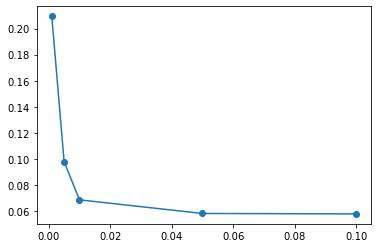

In [148]:
plt.plot(learn,scores,'o-')

print("best learn_rate {}".format(learn[np.argmin(scores)]))

# 最优模型确定

In [150]:
gbm = lgb.LGBMRegressor(boosting_type='gbdt', 
                      num_leaves=31,
                      max_depth=7,
                      learning_rate=0.1,
                      n_estimators=300,
                      min_child_samples=20,
                      n_jobs=-1)
gbm.fit(x_train,y_train)

LGBMRegressor(max_depth=7, n_estimators=300)

In [153]:
import joblib

In [154]:
joblib.dump(gbm,'./data/pubg.pkl')

['./data/pubg.pkl']

In [155]:
best_model = joblib.load('./data/pubg.pkl')

In [156]:
best_model.score(x_test,y_test)

0.9315798650800152